# 백준 문제 풀어보기

문제
두 정수 A와 B를 입력받은 다음, A+B를 출력하는 프로그램을 작성하시오.


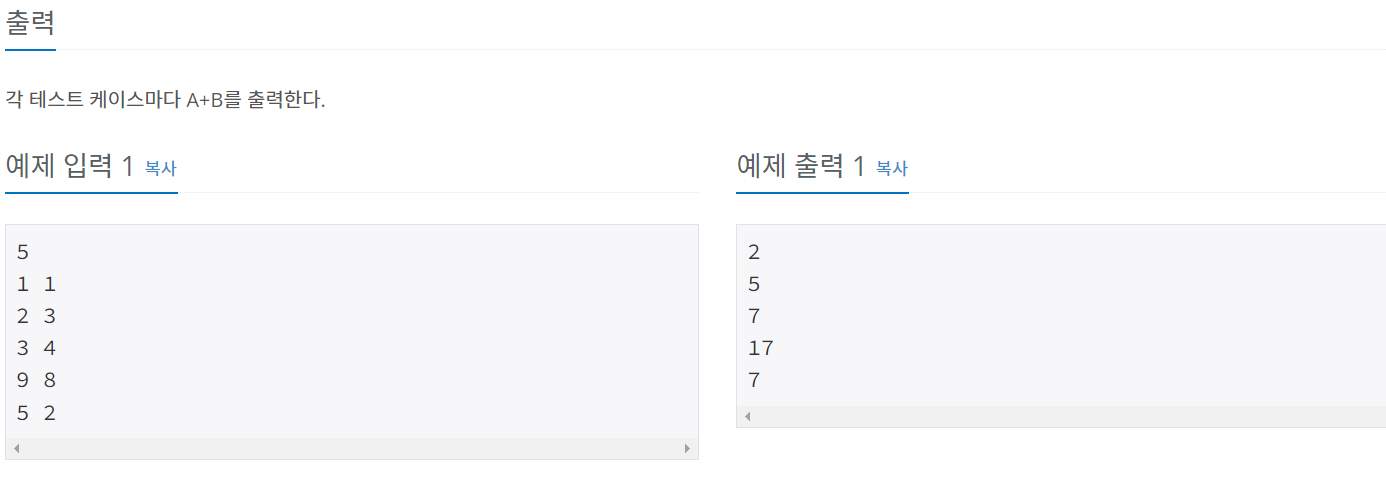

오늘은 혜아의 면접 날이다. 면접 준비를 열심히 해서 앞선 질문들을 잘 대답한 혜아는 이제 마지막으로 칠판에 직접 코딩하는 문제를 받았다. 혜아가 받은 문제는 두 수를 더하는 문제였다. C++ 책을 열심히 읽었던 혜아는 간단히 두 수를 더하는 코드를 칠판에 적었다. 코드를 본 면접관은 다음 질문을 했다. “만약, 입출력이 
N바이트 크기의 정수라면 프로그램을 어떻게 구현해야 할까요?”

혜아는 책에 있는 정수 자료형과 관련된 내용을 기억해 냈다. 책에는 long int는 
4바이트 정수까지 저장할 수 있는 정수 자료형이고 long long int는 
8바이트 정수까지 저장할 수 있는 정수 자료형이라고 적혀 있었다. 혜아는 이런 생각이 들었다. “int 앞에 long을 하나씩 더 붙일 때마다 
4바이트씩 저장할 수 있는 공간이 늘어나는 걸까? 분명 long long long int는 
12바이트, long long long long int는 
16바이트까지 저장할 수 있는 정수 자료형일 거야!” 그렇게 혜아는 당황하는 면접관의 얼굴을 뒤로한 채 칠판에 정수 자료형을 써 내려가기 시작했다.

혜아가 N바이트 정수까지 저장할 수 있다고 생각해서 칠판에 쓴 정수 자료형의 이름은 무엇일까??

### (입력수는 4의 배수로 가정)

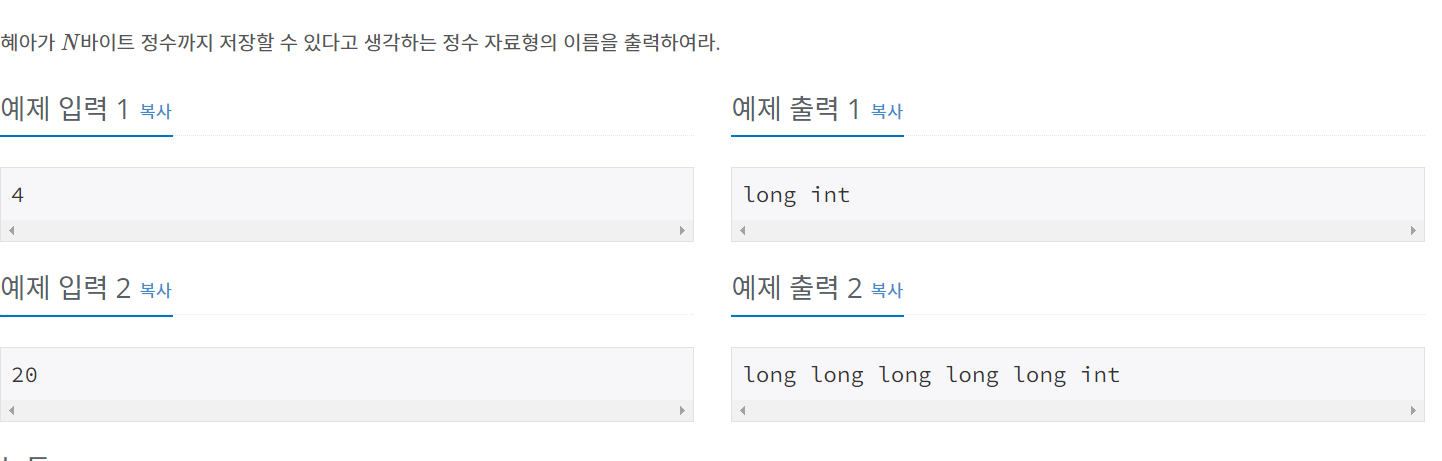


----
# 변수 선택 연습해보기


In [3]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## 필터 기법 

### information gain

    # Iris 데이터를 로드합니다.
    data = load_iris()
    X = data.data
    y = data.target

    # 독립 변수와 종속 변수를 데이터프레임으로 변환합니다.
    df = pd.DataFrame(X, columns=data.feature_names)
    df['target'] = y

    # 종속 변수 열 이름을 설정합니다.
    target_column = 'target'

    # 독립 변수와 종속 변수를 분리합니다.
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 변수와 종속 변수 간의 상호 정보량(Information Gain)을 계산합니다.
    information_gains = mutual_info_classif(X, y)

    # 상호 정보량(Information Gain)을 기준으로 변수를 정렬합니다.
    # sorted 함수는 zip 함수로 묶인 튜플들을 정렬
    # key=lambda x: x[1]은 정렬의 기준을 나타내는 함수인데, 여기서는 튜플의 두 번째 요소인 상호 정보량을 기준으로 정렬하도록 설정되어 있습니다. 
    # reverse=True는 내림차순으로 정렬하도록 지정
    sorted_features = sorted(zip(X.columns, information_gains), key=lambda x: x[1], reverse=True)


    # 선택된 변수를 출력합니다. (상위 두개의 변수 선택)
    print("Selected Features:", sorted_features[:2])

### chi2
    카이제곱 검정을 사용하여 변수를 선택하는 것은 독립성 검정의 한 형태

    귀무 가설(H0): 변수와 종속 변수 간에는 독립성이 있다.
    대립 가설(H1): 변수와 종속 변수 간에는 독립성이 없다.

    종속변수와 설명변수의 카이제곱 검정을 통해 두 변수 간 독립성을 보고 독립성이 낮을수록 종속변수를 예측하는 설명변수의 예측력이 높다고 보는 방법
    - 일반적으로, 카이제곱 통계량이 크고 p-value가 작은 변수들을 선택하여 모델을 구축하거나 데이터 분석을 수행  

    data = load_iris()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target

    # 변수와 종속 변수 간의 카이제곱 검정 수행
    chi2_scores = []
    for column in X.columns:
        contingency_table = pd.crosstab(X[column], y) #  카이제곱 검정을 수행하기 위해 독립 변수(X의 특정 열)와 종속 변수(y) 간의 교차 테이블을 생성
        chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)
        # 카이제곱 통계량(chi2), p-value(p_value), 자유도(dof), 예상 빈도(expected_freq)
        chi2_scores.append((column, chi2))

    # 카이제곱 검정 결과를 기준으로 변수 정렬
    sorted_features = sorted(chi2_scores, key=lambda x: x[1], reverse=True)

    # 상위 2개의 변수 선택
    # 카이제곱 통계량이 클수록 독립 변수와 종속 변수 간의 관련성이 강하다고 본다
    selected_features = sorted_features[:2]

    # 선택된 변수 출력
    print("Selected Features:", selected_features)


In [21]:
# zip 함수 예시
numbers = [1, 2, 3]
letters = ['a', 'b', 'c']
zipped = zip(numbers, letters)

for pair in zipped:
    print(pair)


(1, 'a')
(2, 'b')
(3, 'c')


----
## 래퍼 기법
변수 선택을 수행하고, 선택된 변수들로 모델을 구축하여 평가하는 과정을 반복


### 전진*후진 선택법
    from sklearn.linear_model import LogisticRegression
    from sklearn.datasets import load_wine

    wine = load_wine()
    X, y = wine.data, wine.target


    # 데이터 분할 (학습 세트와 테스트 세트)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 변수 선택기(SequentialFeatureSelector) 정의
    # estimator: 변수 선택에 사용할 머신 러닝 모델
    # n_features_to_select: 선택할 변수의 개수
    # "r2"는 결정 계수(R-squared)
    # direction = "forward"("backward")로 설정하여 전진 선택법 사용 (default=’forward’)
    selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=3, direction = "forward" , scoring='r2', cv=5,n_jobs=-1)

    # 변수 선택 수행
    selector.fit(X_train, y_train)

    # 선택된 변수의 인덱스
    selected_features = selector.get_support(indices=True)
    print(selected_features)

    # 선택된 변수 출력
    for i in selected_features:
        print(wine.feature_names[i])


## 전진/후진 선택법을 이용한 stepwise

    #  데이터 로드 후 데이터프레임 형성
    from sklearn.datasets import load_iris
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target

    # 데이터 분할
    x = df.drop(columns="target", axis=1)
    y = df["target"]
    x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #  변수 선택 후 결과 저장할 데이터 프레임 생성
    df_select = pd.DataFrame()
    df_select.index = x_train.columns

    selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=3, direction = "forward" , scoring='r2', cv=5,n_jobs=-1)
    selector.fit(x_train, y_train)
    df_select["fwd"] = selector.get_support().tolist()

    selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=3, direction = "backward" , scoring='r2', cv=5,n_jobs=-1)
    selector.fit(x_train, y_train)
    df_select["bwd"] = selector.get_support().tolist()

    df_select